# Used Car Sales Prediction

### Project Overview

This project aims to build a machine learning model that predicts the price of used cars based on various features such as make, model, year, mileage, condition, and other relevant attributes. The goal is to create a robust model that can estimate the price of a car accurately, enabling potential buyers and sellers to make informed decisions.

Dataset: www.kaggle.com/datasets/ayaz11/used-car-price-prediction

### Project Owner: Manuel Contreras


#### Libraries

In [253]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#### Data Import

In [254]:
# Load CSV file
file_path = r'C:\Users\manue\Desktop\DataScience\Datasets\car_web_scraped_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998"
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498"


In [255]:
rows, columns = df.shape
print(f"The dataset has {columns} columns and {rows} rows.")

The dataset has 6 columns and 2840 rows.


In [256]:
column_names = df.columns.values
column_names

array(['name', 'year', 'miles', 'color', 'condition', 'price'],
      dtype=object)

#### Data Preparation: Cleaning and Feature Engineering

In [257]:
# missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

name         0
year         0
miles        0
color        0
condition    0
price        0
dtype: int64


In [258]:
# duplicates values
duplicates = df[df.duplicated()]
duplicates

,name,year,miles,color,condition,price
45,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
110,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
124,Mercedes-Benz C-Class,2021,"18,769 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$29,990"
125,BMW 7 Series,2015,"57,707 miles","White exterior, Black interior","No accidents reported, 3 Owners","$27,998"
129,Honda CR-V,2020,"74,031 miles","Gray exterior, Gray interior","No accidents reported, 1 Owner","$23,998"
...,...,...,...,...,...,...
2747,BMW 3 Series,2021,"11,716 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$33,999"
2748,Toyota Camry,2015,"72,858 miles","Gray exterior, Gray interior","No accidents reported, 1 Owner","$15,991"
2749,Ford Transit Cargo Van,2019,"52,902 miles","White exterior, Gray interior","No accidents reported, 1 Owner","$34,997"
2750,Ford Explorer,2018,"54,567 miles","Black exterior, Black interior","2 accidents reported, 3 Owners","$19,900"


In [259]:
rows, columns = duplicates.shape
print(f"There are {rows} duplicates")

There are 528 duplicates


In [260]:
# elimination of duplicates values
df = df.drop_duplicates(keep='last')

In [261]:
rows, columns = df.shape
print(f"The dataset has {columns} columns and {rows} rows.")

The dataset has 6 columns and 2312 rows.


In [262]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312 entries, 2 to 2839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       2312 non-null   object
 1   year       2312 non-null   int64 
 2   miles      2312 non-null   object
 3   color      2312 non-null   object
 4   condition  2312 non-null   object
 5   price      2312 non-null   object
dtypes: int64(1), object(5)
memory usage: 126.4+ KB


In [263]:
df.head(100)

,name,year,miles,color,condition,price
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998"
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498"
5,Honda Civic,2020,"29,026 miles","Silver exterior, Black interior","1 accident reported, 1 Owner","$21,000"
6,Honda Accord,2019,"4,148 miles","Black exterior, Black interior","1 accident reported, 1 Owner","$20,998"
...,...,...,...,...,...,...
145,BMW 3 Series,2015,"60,478 miles","Black exterior, Black interior","1 accident reported, 2 Owners","$16,998"
146,Land Rover Range Rover Sport,2021,"53,743 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$47,995"
147,Chevrolet Equinox,2020,"28,980 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,795"
148,Porsche Cayenne,2020,"44,880 miles","Silver exterior, Black interior","No accidents reported, 3 Owners","$43,998"


In [264]:
df['brand'] = df['name'].str.split().str[0]

In [265]:
unique_brands = df['brand'].unique()
print("Unique brands:", unique_brands)

Unique brands: ['Toyota' 'Honda' 'Mercedes-Benz' 'BMW' 'Jeep' 'Porsche' 'Buick' 'Kia'
 'Nissan' 'Volkswagen' 'Land' 'INFINITI' 'Volvo' 'Ford' 'Chevrolet'
 'Mitsubishi' 'Lexus' 'Hyundai' 'Chrysler' 'Mazda' 'Acura' 'Maserati'
 'Dodge' 'Subaru' 'Audi' 'Jaguar' 'GMC' 'Cadillac' 'Ram' 'Alfa' 'FIAT'
 'Lincoln' 'Aston' 'MINI' 'Genesis' 'Scion' 'McLaren' 'Karma'
 'Rolls-Royce' 'Bentley' 'Saturn' 'Pontiac']


In [266]:
# Replace specific values in the 'brand' column
df['brand'] = df['brand'].replace({
    'Land': 'Land Rover',
    'Alfa': 'Alfa Romeo',
    'Aston': 'Aston Martin'
})

In [267]:
unique_brands = df['brand'].unique()
print("Unique brands:", unique_brands)

Unique brands: ['Toyota' 'Honda' 'Mercedes-Benz' 'BMW' 'Jeep' 'Porsche' 'Buick' 'Kia'
 'Nissan' 'Volkswagen' 'Land Rover' 'INFINITI' 'Volvo' 'Ford' 'Chevrolet'
 'Mitsubishi' 'Lexus' 'Hyundai' 'Chrysler' 'Mazda' 'Acura' 'Maserati'
 'Dodge' 'Subaru' 'Audi' 'Jaguar' 'GMC' 'Cadillac' 'Ram' 'Alfa Romeo'
 'FIAT' 'Lincoln' 'Aston Martin' 'MINI' 'Genesis' 'Scion' 'McLaren'
 'Karma' 'Rolls-Royce' 'Bentley' 'Saturn' 'Pontiac']


In [268]:
df.head()

,name,year,miles,color,condition,price,brand
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988",Toyota
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998",Honda
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498",Honda
5,Honda Civic,2020,"29,026 miles","Silver exterior, Black interior","1 accident reported, 1 Owner","$21,000",Honda
6,Honda Accord,2019,"4,148 miles","Black exterior, Black interior","1 accident reported, 1 Owner","$20,998",Honda


In [269]:
# Remove the word 'miles' and convert the values to numeric
df['miles'] = df['miles'].str.replace(' miles', '').str.replace(',', '').astype(float)
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [270]:
df.head()

,name,year,miles,color,condition,price,brand
2,Toyota RAV4,2022,32879.0,"Silver exterior, Unknown interior","No accidents reported, 1 Owner",24988.0,Toyota
3,Honda Civic,2020,37190.0,"Blue exterior, Black interior","No accidents reported, 1 Owner",18998.0,Honda
4,Honda Civic,2020,27496.0,"Black exterior, Black interior","No accidents reported, 1 Owner",19498.0,Honda
5,Honda Civic,2020,29026.0,"Silver exterior, Black interior","1 accident reported, 1 Owner",21000.0,Honda
6,Honda Accord,2019,4148.0,"Black exterior, Black interior","1 accident reported, 1 Owner",20998.0,Honda


In [271]:
# Split the 'color' column into two new columns
df[['color_exterior', 'color_interior']] = df['color'].str.split(',', expand=True)

# Remove any leading or trailing spaces from the new columns
df['color_exterior'] = df['color_exterior'].str.strip()
df['color_interior'] = df['color_interior'].str.strip()

# Now, 'color_exterior' and 'color_interior' will have the respective colors


In [272]:
df.head()

,name,year,miles,color,condition,price,brand,color_exterior,color_interior
2,Toyota RAV4,2022,32879.0,"Silver exterior, Unknown interior","No accidents reported, 1 Owner",24988.0,Toyota,Silver exterior,Unknown interior
3,Honda Civic,2020,37190.0,"Blue exterior, Black interior","No accidents reported, 1 Owner",18998.0,Honda,Blue exterior,Black interior
4,Honda Civic,2020,27496.0,"Black exterior, Black interior","No accidents reported, 1 Owner",19498.0,Honda,Black exterior,Black interior
5,Honda Civic,2020,29026.0,"Silver exterior, Black interior","1 accident reported, 1 Owner",21000.0,Honda,Silver exterior,Black interior
6,Honda Accord,2019,4148.0,"Black exterior, Black interior","1 accident reported, 1 Owner",20998.0,Honda,Black exterior,Black interior


In [273]:
# Remove the words 'exterior' and 'interior' from the respective columns
df['color_exterior'] = df['color_exterior'].str.replace(' exterior', '', regex=False)
df['color_interior'] = df['color_interior'].str.replace(' interior', '', regex=False)

# Optionally, remove any extra spaces if necessary
df['color_exterior'] = df['color_exterior'].str.strip()
df['color_interior'] = df['color_interior'].str.strip()

In [274]:
df.head()

,name,year,miles,color,condition,price,brand,color_exterior,color_interior
2,Toyota RAV4,2022,32879.0,"Silver exterior, Unknown interior","No accidents reported, 1 Owner",24988.0,Toyota,Silver,Unknown
3,Honda Civic,2020,37190.0,"Blue exterior, Black interior","No accidents reported, 1 Owner",18998.0,Honda,Blue,Black
4,Honda Civic,2020,27496.0,"Black exterior, Black interior","No accidents reported, 1 Owner",19498.0,Honda,Black,Black
5,Honda Civic,2020,29026.0,"Silver exterior, Black interior","1 accident reported, 1 Owner",21000.0,Honda,Silver,Black
6,Honda Accord,2019,4148.0,"Black exterior, Black interior","1 accident reported, 1 Owner",20998.0,Honda,Black,Black


In [275]:
df.head()

,name,year,miles,color,condition,price,brand,color_exterior,color_interior
2,Toyota RAV4,2022,32879.0,"Silver exterior, Unknown interior","No accidents reported, 1 Owner",24988.0,Toyota,Silver,Unknown
3,Honda Civic,2020,37190.0,"Blue exterior, Black interior","No accidents reported, 1 Owner",18998.0,Honda,Blue,Black
4,Honda Civic,2020,27496.0,"Black exterior, Black interior","No accidents reported, 1 Owner",19498.0,Honda,Black,Black
5,Honda Civic,2020,29026.0,"Silver exterior, Black interior","1 accident reported, 1 Owner",21000.0,Honda,Silver,Black
6,Honda Accord,2019,4148.0,"Black exterior, Black interior","1 accident reported, 1 Owner",20998.0,Honda,Black,Black


In [276]:
# Get unique values of 'color_exterior' and 'color_interior' columns
unique_exterior_colors = df['color_exterior'].unique()
unique_interior_colors = df['color_interior'].unique()

# Print the unique values
print("Unique values in 'color_exterior':")
print(unique_exterior_colors)

print("\nUnique values in 'color_interior':")
print(unique_interior_colors)

Unique values in 'color_exterior':
['Silver' 'Blue' 'Black' 'White' 'Gray' 'Red' 'Orange' 'Unknown' 'Green'
 'Tan' 'Gold' 'Yellow' 'Brown' 'Purple']

Unique values in 'color_interior':
['Unknown' 'Black' 'Beige' 'Brown' 'Gray' 'Orange' 'Red' 'Green' 'White'
 'Blue' 'Yellow']


In [277]:
# Split the 'condition' column based on the comma and assign the result to two new columns
df[['accidents', 'number_of_owners']] = df['condition'].str.split(',', expand=True)

# Optionally, strip any extra spaces if necessary
df['accidents'] = df['accidents'].str.strip()
df['number_of_owners'] = df['number_of_owners'].str.strip()

In [278]:
df.head()

,name,year,miles,color,condition,price,brand,color_exterior,color_interior,accidents,number_of_owners
2,Toyota RAV4,2022,32879.0,"Silver exterior, Unknown interior","No accidents reported, 1 Owner",24988.0,Toyota,Silver,Unknown,No accidents reported,1 Owner
3,Honda Civic,2020,37190.0,"Blue exterior, Black interior","No accidents reported, 1 Owner",18998.0,Honda,Blue,Black,No accidents reported,1 Owner
4,Honda Civic,2020,27496.0,"Black exterior, Black interior","No accidents reported, 1 Owner",19498.0,Honda,Black,Black,No accidents reported,1 Owner
5,Honda Civic,2020,29026.0,"Silver exterior, Black interior","1 accident reported, 1 Owner",21000.0,Honda,Silver,Black,1 accident reported,1 Owner
6,Honda Accord,2019,4148.0,"Black exterior, Black interior","1 accident reported, 1 Owner",20998.0,Honda,Black,Black,1 accident reported,1 Owner


In [279]:
# Get unique values of 'color_exterior' and 'color_interior' columns
unique_accidents = df['accidents'].unique()
unique_number_of_owners = df['number_of_owners'].unique()

# Print the unique values
print("Unique values in 'accidents':")
print(unique_accidents)

print("\nUnique values in 'color_interior':")
print(unique_number_of_owners)

Unique values in 'accidents':
['No accidents reported' '1 accident reported' '3 accidents reported'
 '2 accidents reported' '4 accidents reported' '5 accidents reported']

Unique values in 'color_interior':
['1 Owner' '3 Owners' '2 Owners' '5 Owners' '4 Owners' '0 Owners'
 '7 Owners' '8 Owners']


In [280]:
# Remove the phrase "accidents reported" from the 'accidents' column
df['accidents'] = df['accidents'].str.replace(' accidents reported', '', regex=False)
df['accidents'] = df['accidents'].str.replace(' accidents reported', '', regex=False)

# Optionally, replace "No" with 0 (if applicable)
df['accidents'] = df['accidents'].replace('No', '0')

# Convert the column to numeric
df['accidents'] = pd.to_numeric(df['accidents'], errors='coerce')


In [281]:
# Get unique values of 'color_exterior' and 'color_interior' columns
unique_accidents = df['accidents'].unique()
unique_number_of_owners = df['number_of_owners'].unique()

# Print the unique values
print("Unique values in 'accidents':")
print(unique_accidents)

print("\nUnique values in 'color_interior':")
print(unique_number_of_owners)

Unique values in 'accidents':
[ 0. nan  3.  2.  4.  5.]

Unique values in 'color_interior':
['1 Owner' '3 Owners' '2 Owners' '5 Owners' '4 Owners' '0 Owners'
 '7 Owners' '8 Owners']


In [282]:
# Replace NaN values in the 'accidents' column with 1
df['accidents'] = df['accidents'].fillna(1)

In [283]:
# Get unique values of 'color_exterior' and 'color_interior' columns
unique_accidents = df['accidents'].unique()
unique_number_of_owners = df['number_of_owners'].unique()

# Print the unique values
print("Unique values in 'accidents':")
print(unique_accidents)

print("\nUnique values in 'color_interior':")
print(unique_number_of_owners)

Unique values in 'accidents':
[0. 1. 3. 2. 4. 5.]

Unique values in 'color_interior':
['1 Owner' '3 Owners' '2 Owners' '5 Owners' '4 Owners' '0 Owners'
 '7 Owners' '8 Owners']


In [284]:
df['accidents'] = pd.to_numeric(df['accidents'], errors='coerce')

In [285]:
# Get unique values of 'color_exterior' and 'color_interior' columns
unique_accidents = df['accidents'].unique()
unique_number_of_owners = df['number_of_owners'].unique()

# Print the unique values
print("Unique values in 'accidents':")
print(unique_accidents)

print("\nUnique values in 'color_interior':")
print(unique_number_of_owners)

Unique values in 'accidents':
[0. 1. 3. 2. 4. 5.]

Unique values in 'color_interior':
['1 Owner' '3 Owners' '2 Owners' '5 Owners' '4 Owners' '0 Owners'
 '7 Owners' '8 Owners']


In [286]:
# Remove the words "Owner" and "Owners" from the 'color_interior' column
df['number_of_owners'] = df['number_of_owners'].str.replace('Owner', '', regex=False)
df['color_interior'] = df['color_interior'].str.replace('Owners', '', regex=False)

# Optionally, strip any leading or trailing spaces after removal
df['number_of_owners'] = df['number_of_owners'].str.strip()


In [287]:
df.head()

,name,year,miles,color,condition,price,brand,color_exterior,color_interior,accidents,number_of_owners
2,Toyota RAV4,2022,32879.0,"Silver exterior, Unknown interior","No accidents reported, 1 Owner",24988.0,Toyota,Silver,Unknown,0.0,1
3,Honda Civic,2020,37190.0,"Blue exterior, Black interior","No accidents reported, 1 Owner",18998.0,Honda,Blue,Black,0.0,1
4,Honda Civic,2020,27496.0,"Black exterior, Black interior","No accidents reported, 1 Owner",19498.0,Honda,Black,Black,0.0,1
5,Honda Civic,2020,29026.0,"Silver exterior, Black interior","1 accident reported, 1 Owner",21000.0,Honda,Silver,Black,1.0,1
6,Honda Accord,2019,4148.0,"Black exterior, Black interior","1 accident reported, 1 Owner",20998.0,Honda,Black,Black,1.0,1


In [288]:
# Get the number of unique values in the 'name' column
unique_values_count = df['name'].nunique()

# Print the result
print(f"Number of unique values in 'name' column: {unique_values_count}")


Number of unique values in 'name' column: 309


In [289]:
# Drop the columns 'name', 'color', and 'condition'
df = df.drop(columns=['name', 'color', 'condition'])

# Alternatively, if you want to drop them in place without creating a new DataFrame, use:
# df.drop(columns=['name', 'color', 'condition'], inplace=True)


In [290]:
df.head()

,year,miles,price,brand,color_exterior,color_interior,accidents,number_of_owners
2,2022,32879.0,24988.0,Toyota,Silver,Unknown,0.0,1
3,2020,37190.0,18998.0,Honda,Blue,Black,0.0,1
4,2020,27496.0,19498.0,Honda,Black,Black,0.0,1
5,2020,29026.0,21000.0,Honda,Silver,Black,1.0,1
6,2019,4148.0,20998.0,Honda,Black,Black,1.0,1


In [291]:
print("Categories in 'year' variable:     ",end=" " )
print(df['year'].unique())

print("Categories in 'brand' variable:  ",end=" ")
print(df['brand'].unique())

print("Categories in'color_exterior' variable:",end=" " )
print(df['color_exterior'].unique())

print("Categories in 'color_interior' variable:     ",end=" " )
print(df['color_interior'].unique())

print("Categories in 'accidents' variable:     ",end=" " )
print(df['accidents'].unique())

print("Categories in 'number_of_owners' variable:     ",end=" " )
print(df['number_of_owners'].unique())

Categories in 'year' variable:      [2022 2020 2019 2018 2013 2021 2016 2014 2017 2015 2023 2011 2012 2000
 2010 2024 2007 2009 2008 2004 2006 2002 2005 2003]
Categories in 'brand' variable:   ['Toyota' 'Honda' 'Mercedes-Benz' 'BMW' 'Jeep' 'Porsche' 'Buick' 'Kia'
 'Nissan' 'Volkswagen' 'Land Rover' 'INFINITI' 'Volvo' 'Ford' 'Chevrolet'
 'Mitsubishi' 'Lexus' 'Hyundai' 'Chrysler' 'Mazda' 'Acura' 'Maserati'
 'Dodge' 'Subaru' 'Audi' 'Jaguar' 'GMC' 'Cadillac' 'Ram' 'Alfa Romeo'
 'FIAT' 'Lincoln' 'Aston Martin' 'MINI' 'Genesis' 'Scion' 'McLaren'
 'Karma' 'Rolls-Royce' 'Bentley' 'Saturn' 'Pontiac']
Categories in'color_exterior' variable: ['Silver' 'Blue' 'Black' 'White' 'Gray' 'Red' 'Orange' 'Unknown' 'Green'
 'Tan' 'Gold' 'Yellow' 'Brown' 'Purple']
Categories in 'color_interior' variable:      ['Unknown' 'Black' 'Beige' 'Brown' 'Gray' 'Orange' 'Red' 'Green' 'White'
 'Blue' 'Yellow']
Categories in 'accidents' variable:      [0. 1. 3. 2. 4. 5.]
Categories in 'number_of_owners' variable:      [

In [292]:
# Clean the 'number_of_owners' column by removing the non-numeric characters
df['number_of_owners'] = df['number_of_owners'].str.extract('(\d+)').astype(float)

# Check the result
print(df['number_of_owners'].unique())


[1. 3. 2. 5. 4. 0. 7. 8.]


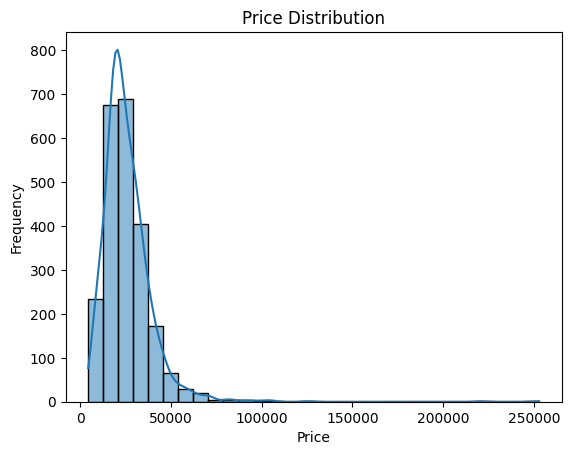

In [293]:
# Plotting the distribution of car prices
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

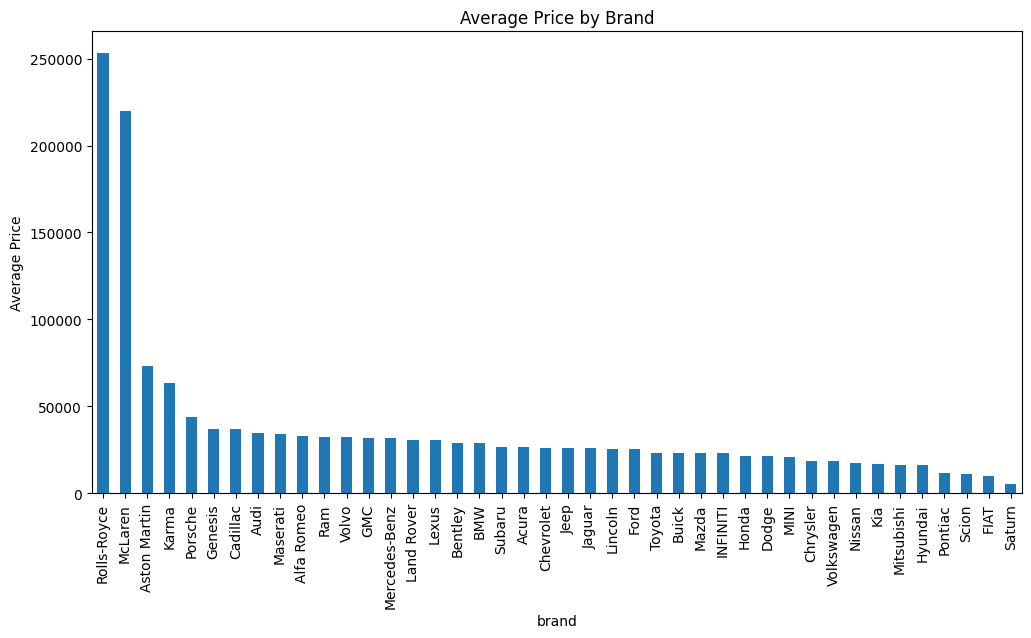

In [294]:
# Grouping by brand and calculating the average price
brand_price = df.groupby('brand')['price'].mean().sort_values(ascending=False)

# Plotting average price by brand
brand_price.plot(kind='bar', figsize=(12,6))
plt.title('Average Price by Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

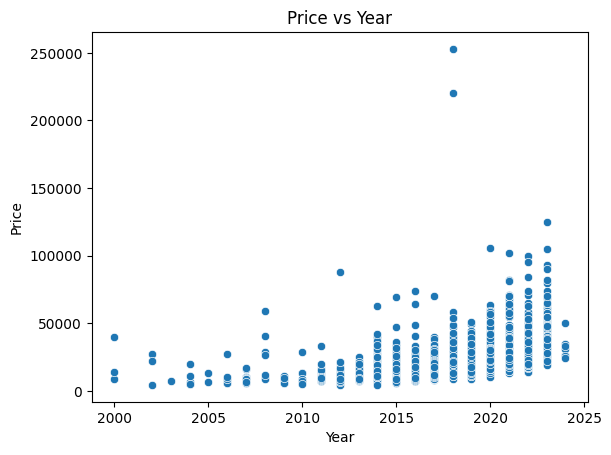

In [295]:
# Scatter plot of price vs year
sns.scatterplot(data=df, x='year', y='price')
plt.title("Price vs Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()


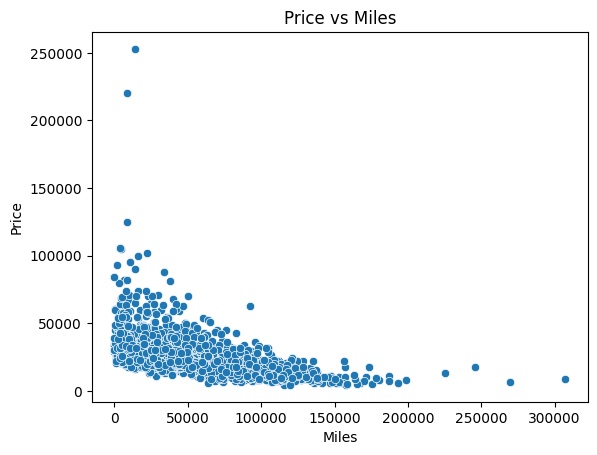

In [296]:
# Scatter plot of price vs miles
sns.scatterplot(data=df, x='miles', y='price')
plt.title("Price vs Miles")
plt.xlabel("Miles")
plt.ylabel("Price")
plt.show()


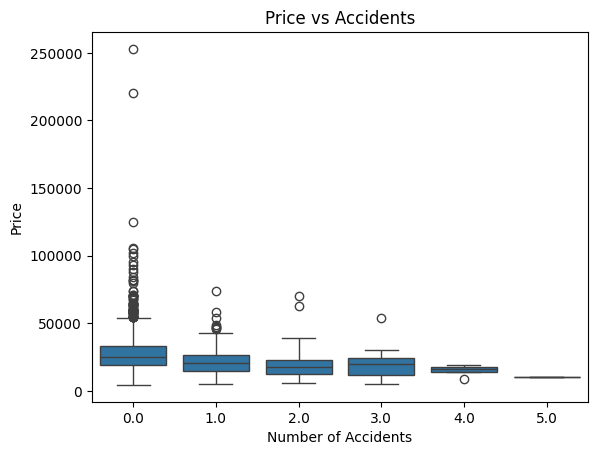

In [297]:
# Boxplot of price by accidents
sns.boxplot(data=df, x='accidents', y='price')
plt.title("Price vs Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Price")
plt.show()


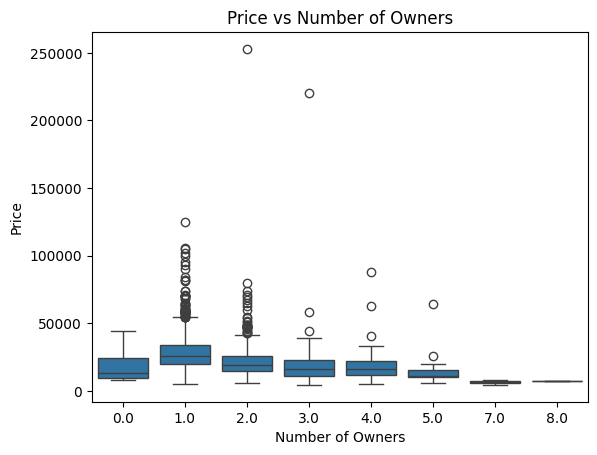

In [298]:
# Boxplot of price by number of owners
sns.boxplot(data=df, x='number_of_owners', y='price')
plt.title("Price vs Number of Owners")
plt.xlabel("Number of Owners")
plt.ylabel("Price")
plt.show()


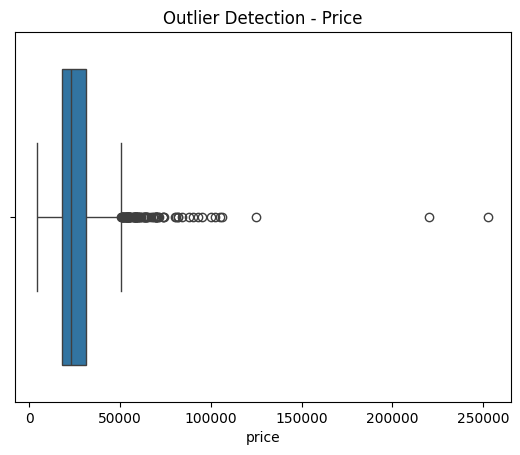

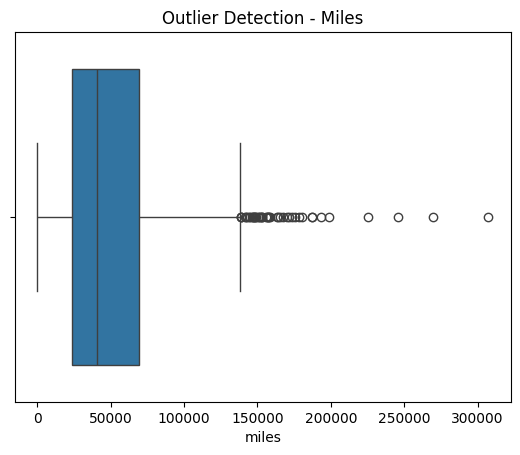

In [299]:
# Boxplot for detecting outliers in price
sns.boxplot(data=df, x='price')
plt.title("Outlier Detection - Price")
plt.show()

# Boxplot for detecting outliers in miles
sns.boxplot(data=df, x='miles')
plt.title("Outlier Detection - Miles")
plt.show()


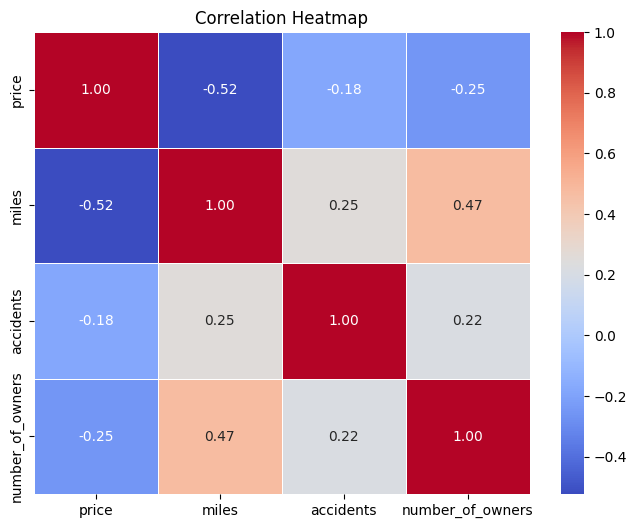

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation matrix
numeric_cols = ['price', 'miles', 'accidents', 'number_of_owners']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


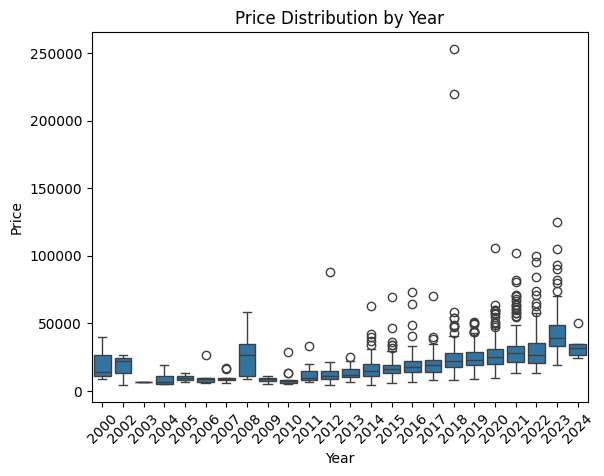

In [301]:
sns.boxplot(x='year', y='price', data=df)
plt.title("Price Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()


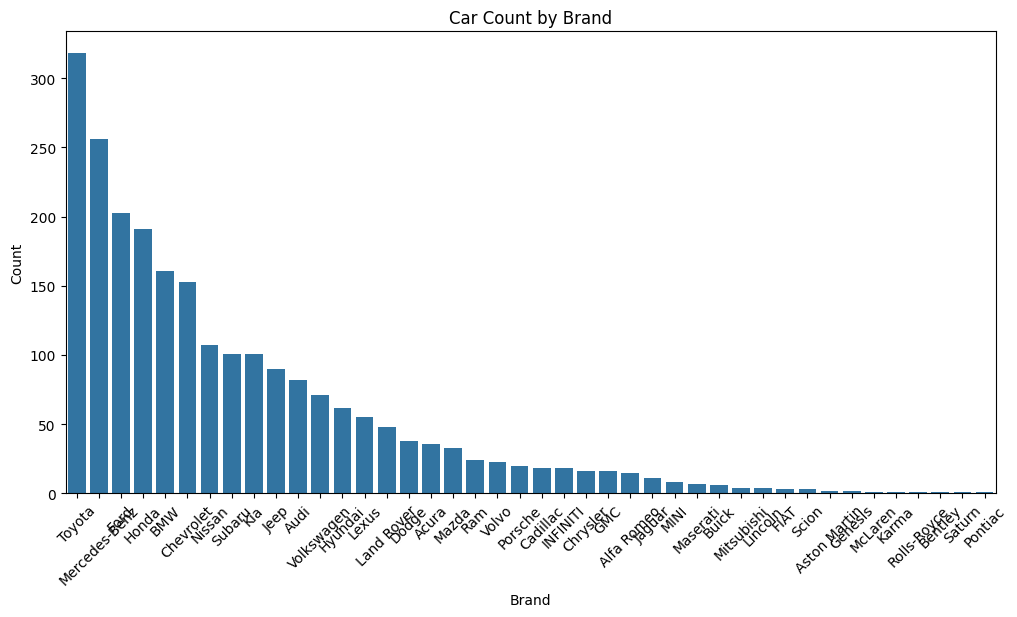

In [302]:
plt.figure(figsize=(12, 6))
sns.countplot(x='brand', data=df, order=df['brand'].value_counts().index)
plt.title("Car Count by Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [303]:
# Filtering the dataset to remove entries where miles is greater than 175000
df = df[df['price'] <= 80000]
df = df[df['price'] >= 1500]
# Check the first few rows of the updated dataset
df.head()

,year,miles,price,brand,color_exterior,color_interior,accidents,number_of_owners
2,2022,32879.0,24988.0,Toyota,Silver,Unknown,0.0,1.0
3,2020,37190.0,18998.0,Honda,Blue,Black,0.0,1.0
4,2020,27496.0,19498.0,Honda,Black,Black,0.0,1.0
5,2020,29026.0,21000.0,Honda,Silver,Black,1.0,1.0
6,2019,4148.0,20998.0,Honda,Black,Black,1.0,1.0


In [304]:
# Filtering the dataset to remove entries where miles is greater than 175000
df = df[df['miles'] <= 175000]

# Check the first few rows of the updated dataset
df.head()

,year,miles,price,brand,color_exterior,color_interior,accidents,number_of_owners
2,2022,32879.0,24988.0,Toyota,Silver,Unknown,0.0,1.0
3,2020,37190.0,18998.0,Honda,Blue,Black,0.0,1.0
4,2020,27496.0,19498.0,Honda,Black,Black,0.0,1.0
5,2020,29026.0,21000.0,Honda,Silver,Black,1.0,1.0
6,2019,4148.0,20998.0,Honda,Black,Black,1.0,1.0


In [305]:
df.head()

,year,miles,price,brand,color_exterior,color_interior,accidents,number_of_owners
2,2022,32879.0,24988.0,Toyota,Silver,Unknown,0.0,1.0
3,2020,37190.0,18998.0,Honda,Blue,Black,0.0,1.0
4,2020,27496.0,19498.0,Honda,Black,Black,0.0,1.0
5,2020,29026.0,21000.0,Honda,Silver,Black,1.0,1.0
6,2019,4148.0,20998.0,Honda,Black,Black,1.0,1.0


In [306]:
# Export DataFrame to the desired path
df.to_csv(r'C:\Users\manue\Desktop\DataScience\Datasets\car_sales_preprocessed.csv', index=False)


In [307]:
# Assuming 'df' is your DataFrame
y = df['price']  # Target variable (price)
X = df.drop(columns=['price'])  # Feature variables (all other columns except 'price')


In [308]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [309]:
X = preprocessor.fit_transform(X)

In [310]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1828, 69), (458, 69))

In [311]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [312]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.01),
    "Ridge": Ridge(alpha=1.0),
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=10, weights='distance'),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, min_samples_split=10),
    "Random Forest Regressor": RandomForestRegressor(
        n_estimators=500, max_depth=20, min_samples_split=10, min_samples_leaf=4, random_state=42),
    "XGBRegressor": XGBRegressor(
        n_estimators=500, max_depth=10, learning_rate=0.05, subsample=0.8, random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=5, random_state=42),
        n_estimators=300, learning_rate=0.1, random_state=42)
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 7282.8089
- Mean Absolute Error: 5222.5348
- R2 Score: 0.5818
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7792.5018
- Mean Absolute Error: 5823.1056
- R2 Score: 0.5084


Lasso
Model performance for Training set
- Root Mean Squared Error: 7282.8092
- Mean Absolute Error: 5222.6183
- R2 Score: 0.5818
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7815.8087
- Mean Absolute Error: 5832.0176
- R2 Score: 0.5055


Ridge
Model performance for Training set
- Root Mean Squared Error: 7313.0660
- Mean Absolute Error: 5267.0657
- R2 Score: 0.5783
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7646.4397
- Mean Absolute Error: 5754.5210
- R2 Score: 0.5267


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 S

In [313]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.526672
0,Linear Regression,0.508416
1,Lasso,0.505471
5,Random Forest Regressor,0.495957
6,XGBRegressor,0.470151
3,K-Neighbors Regressor,0.410835
4,Decision Tree,0.403455
7,AdaBoost Regressor,0.271249


In [314]:
from sklearn.metrics import r2_score

# Get the Ridge model from the dictionary
ridge_model = models["Ridge"]

# Train the Ridge model
ridge_model.fit(X_train, y_train)

# Make predictions
y_test_pred = ridge_model.predict(X_test)

# Calculate R^2 Score
ridge_r2_score = r2_score(y_test, y_test_pred)

# Print the R^2 Score
print("R^2 Score for Ridge model: {:.4f}".format(ridge_r2_score))


R^2 Score for Ridge model: 0.5267


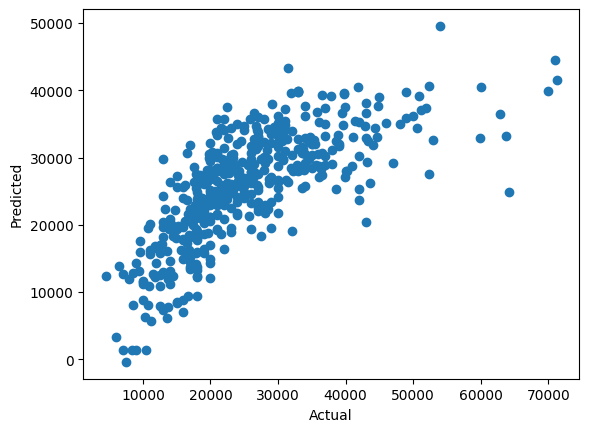

In [315]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

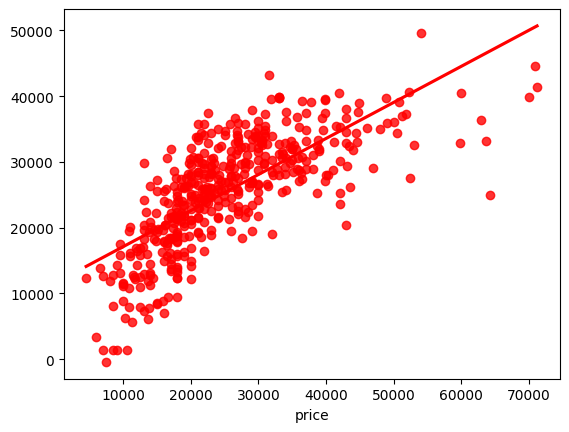

In [316]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [317]:
import pandas as pd

# Assuming y_test and y_pred are already defined
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred,
})

# Calculate the percentage difference
pred_df['Percentage Difference'] = ((pred_df['Predicted Value'] - pred_df['Actual Value']) / pred_df['Actual Value']) * 100

# Display the DataFrame
pred_df


,Actual Value,Predicted Value,Difference,Percentage Difference
1975,20989.0,35709.749139,-14720.749139,70.135543
1546,32995.0,39712.316830,-6717.316830,20.358590
1983,23400.0,25220.946547,-1820.946547,7.781823
1056,30763.0,34381.641466,-3618.641466,11.762967
2711,4495.0,12324.215376,-7829.215376,174.176093
...,...,...,...,...
1976,51187.0,37047.395579,14139.604421,-27.623429
2413,41998.0,30169.822963,11828.177037,-28.163667
1604,16220.0,20395.850282,-4175.850282,25.745070
2356,32998.0,27984.807861,5013.192139,-15.192412


In [318]:
import pandas as pd

# Assuming y_test and y_pred are already defined
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred,
})

# Calculate the percentage difference (absolute)
pred_df['Percentage Difference'] = abs((pred_df['Predicted Value'] - pred_df['Actual Value']) / pred_df['Actual Value']) * 100

# Display the DataFrame
print(pred_df)

# Calculate the average percentage difference
average_percentage_difference = pred_df['Percentage Difference'].mean()
print(f"\nAverage Percentage Difference: {average_percentage_difference:.2f}%")


      Actual Value  Predicted Value    Difference  Percentage Difference
1975       20989.0     35709.749139 -14720.749139              70.135543
1546       32995.0     39712.316830  -6717.316830              20.358590
1983       23400.0     25220.946547  -1820.946547               7.781823
1056       30763.0     34381.641466  -3618.641466              11.762967
2711        4495.0     12324.215376  -7829.215376             174.176093
...            ...              ...           ...                    ...
1976       51187.0     37047.395579  14139.604421              27.623429
2413       41998.0     30169.822963  11828.177037              28.163667
1604       16220.0     20395.850282  -4175.850282              25.745070
2356       32998.0     27984.807861   5013.192139              15.192412
2615       28333.0     31114.635525  -2781.635525               9.817653

[458 rows x 4 columns]

Average Percentage Difference: 24.93%
